#Importing the Necessary Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
pip install fasttext

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 68 kB 5.3 MB/s 
  Using cached pybind11-2.10.1-py3-none-any.whl (216 kB)
  Created wheel for fasttext: filename=fasttext-0.9.2-cp37-cp37m-linux_x86_64.whl size=3155969 sha256=d0f6e4bbd14f03db4b6e7a1042e5888744a3c6676437f2e9d693055944da88ad
  Stored in directory: /root/.cache/pip/wheels/4e/ca/bf/b020d2be95f7641801a6597a29c8f4f19e38f9c02a345bab9b
Successfully built fasttext


In [ ]:
pip install contractions

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 106 kB 15.8 MB/s 
     |████████████████████████████████| 287 kB 39.3 MB/s 


In [ ]:
import fasttext
import contractions

In [ ]:
from textblob import TextBlob
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation, NMF
from wordcloud import WordCloud, ImageColorGenerator
import pickle
from collections import Counter

In [ ]:
import nltk
import string
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords, wordnet
from nltk.stem import WordNetLemmatizer
from nltk.probability import FreqDist

In [ ]:
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

#Importing Dataset

In [ ]:
df = pd.read_csv("dataset.csv")

In [ ]:
df.head()

,link_id,parent_id,User,Text,Intent,Support
0,t3_l71j1l,t1_gl43z92,chasetate27,GME &amp; BB are not on cashapp but AMC &amp; ...,i,i
1,t3_ki3745,t3_ki3745,pmd5700,"Oh GME, you tease!",u,u
2,t3_la75n9,t3_la75n9,PigLizzard,"Dump gme, amc, nok, and bb so we can all buy s...",u,n
3,t3_lw6hoh,t1_gpfpvtf,anono87,Not a single decent DD posted? 9 billion in re...,u,u
4,t3_l9xqem,t3_l9xqem,gluino,Just got into $GME @ 220.,y,u


In [ ]:
df.columns

Index(['link_id', 'parent_id', 'User', 'Text', 'Intent', 'Support'], dtype='object')

In [ ]:
df['Intent'].value_counts()

u     3246
y      983
m      370
i      318
n       83
 u       1
Name: Intent, dtype: int64

In [ ]:
df['Intent']=df['Intent'].replace(' u','u')

In [ ]:
df['Intent'].value_counts()

u    3247
y     983
m     370
i     318
n      83
Name: Intent, dtype: int64

In [ ]:
df['Support'].value_counts()

y    2473
u    1979
n     292
i     257
Name: Support, dtype: int64

In [ ]:
df.isnull().sum()

link_id      19
parent_id    19
User         19
Text         19
Intent       19
Support      19
dtype: int64

In [ ]:
df[df.isna().any(axis=1)]

,link_id,parent_id,User,Text,Intent,Support
5001,NaN,NaN,NaN,NaN,NaN,NaN
5002,NaN,NaN,NaN,NaN,NaN,NaN
5003,NaN,NaN,NaN,NaN,NaN,NaN
5004,NaN,NaN,NaN,NaN,NaN,NaN
5005,NaN,NaN,NaN,NaN,NaN,NaN
5006,NaN,NaN,NaN,NaN,NaN,NaN
5007,NaN,NaN,NaN,NaN,NaN,NaN
5008,NaN,NaN,NaN,NaN,NaN,NaN
5009,NaN,NaN,NaN,NaN,NaN,NaN
5010,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df=df.head(5000)
df

,link_id,parent_id,User,Text,Intent,Support
0,t3_l71j1l,t1_gl43z92,chasetate27,GME &amp; BB are not on cashapp but AMC &amp; ...,i,i
1,t3_ki3745,t3_ki3745,pmd5700,"Oh GME, you tease!",u,u
2,t3_la75n9,t3_la75n9,PigLizzard,"Dump gme, amc, nok, and bb so we can all buy s...",u,n
3,t3_lw6hoh,t1_gpfpvtf,anono87,Not a single decent DD posted? 9 billion in re...,u,u
4,t3_l9xqem,t3_l9xqem,gluino,Just got into $GME @ 220.,y,u
...,...,...,...,...,...,...
4995,t3_lpdq4p,t3_lpdq4p,BagOfShenanigans,I wonder if they should rebrand as GME,u,u
4996,t3_l8ma5x,t3_l8ma5x,anonisland5,Bankrupting a hedge fund is an inherently anti...,u,u
4997,t3_lb6aiq,t1_gltj1f7,elheffe07,"good question, if the stock reaches below 5 bu...",u,y
4998,t3_k4ixya,t3_k4ixya,Bandeeznutz,GME 12/4 $14.5p,n,u


In [ ]:
df.isnull().sum()

link_id      0
parent_id    0
User         0
Text         0
Intent       0
Support      0
dtype: int64

# Text Pre-Processing

In [ ]:
# removing of html tags
import re
CLEANR = re.compile('<.*?> | &([a-z0-9]+|#[0-9]{1,6}|#x[0-9a-f]{1,6});')

def cleanhtml(raw_html):
  cleantext = re.sub(CLEANR, '', raw_html)
  return cleantext 

In [ ]:
df['Text'] = df['Text'].apply(cleanhtml)
df

,link_id,parent_id,User,Text,Intent,Support
0,t3_l71j1l,t1_gl43z92,chasetate27,GME BB are not on cashapp but AMC NOK are,i,i
1,t3_ki3745,t3_ki3745,pmd5700,"Oh GME, you tease!",u,u
2,t3_la75n9,t3_la75n9,PigLizzard,"Dump gme, amc, nok, and bb so we can all buy s...",u,n
3,t3_lw6hoh,t1_gpfpvtf,anono87,Not a single decent DD posted? 9 billion in re...,u,u
4,t3_l9xqem,t3_l9xqem,gluino,Just got into $GME @ 220.,y,u
...,...,...,...,...,...,...
4995,t3_lpdq4p,t3_lpdq4p,BagOfShenanigans,I wonder if they should rebrand as GME,u,u
4996,t3_l8ma5x,t3_l8ma5x,anonisland5,Bankrupting a hedge fund is an inherently anti...,u,u
4997,t3_lb6aiq,t1_gltj1f7,elheffe07,"good question, if the stock reaches below 5 bu...",u,y
4998,t3_k4ixya,t3_k4ixya,Bandeeznutz,GME 12/4 $14.5p,n,u


Expanding Contractions

In [ ]:
df['no_contract'] = df['Text'].apply(lambda x: [contractions.fix(word) for word in x.split()])
df.head()

,link_id,parent_id,User,Text,Intent,Support,no_contract
0,t3_l71j1l,t1_gl43z92,chasetate27,GME BB are not on cashapp but AMC NOK are,i,i,"[GME, BB, are, not, on, cashapp, but, AMC, NOK..."
1,t3_ki3745,t3_ki3745,pmd5700,"Oh GME, you tease!",u,u,"[Oh, GME,, you, tease!]"
2,t3_la75n9,t3_la75n9,PigLizzard,"Dump gme, amc, nok, and bb so we can all buy s...",u,n,"[Dump, gme,, amc,, nok,, and, bb, so, we, can,..."
3,t3_lw6hoh,t1_gpfpvtf,anono87,Not a single decent DD posted? 9 billion in re...,u,u,"[Not, a, single, decent, DD, posted?, 9, billi..."
4,t3_l9xqem,t3_l9xqem,gluino,Just got into $GME @ 220.,y,u,"[Just, got, into, $GME, @, 220.]"


In [ ]:
df['Text_str'] = [' '.join(map(str, l)) for l in df['no_contract']]
df.head()

,link_id,parent_id,User,Text,Intent,Support,no_contract,Text_str
0,t3_l71j1l,t1_gl43z92,chasetate27,GME BB are not on cashapp but AMC NOK are,i,i,"[GME, BB, are, not, on, cashapp, but, AMC, NOK...",GME BB are not on cashapp but AMC NOK are
1,t3_ki3745,t3_ki3745,pmd5700,"Oh GME, you tease!",u,u,"[Oh, GME,, you, tease!]","Oh GME, you tease!"
2,t3_la75n9,t3_la75n9,PigLizzard,"Dump gme, amc, nok, and bb so we can all buy s...",u,n,"[Dump, gme,, amc,, nok,, and, bb, so, we, can,...","Dump gme, amc, nok, and bb so we can all buy s..."
3,t3_lw6hoh,t1_gpfpvtf,anono87,Not a single decent DD posted? 9 billion in re...,u,u,"[Not, a, single, decent, DD, posted?, 9, billi...",Not a single decent DD posted? 9 billion in re...
4,t3_l9xqem,t3_l9xqem,gluino,Just got into $GME @ 220.,y,u,"[Just, got, into, $GME, @, 220.]",Just got into $GME @ 220.


Tokenization

In [ ]:
df['tokenized'] = df['Text_str'].apply(word_tokenize)
df.head()

,link_id,parent_id,User,Text,Intent,Support,no_contract,Text_str,tokenized
0,t3_l71j1l,t1_gl43z92,chasetate27,GME BB are not on cashapp but AMC NOK are,i,i,"[GME, BB, are, not, on, cashapp, but, AMC, NOK...",GME BB are not on cashapp but AMC NOK are,"[GME, BB, are, not, on, cashapp, but, AMC, NOK..."
1,t3_ki3745,t3_ki3745,pmd5700,"Oh GME, you tease!",u,u,"[Oh, GME,, you, tease!]","Oh GME, you tease!","[Oh, GME, ,, you, tease, !]"
2,t3_la75n9,t3_la75n9,PigLizzard,"Dump gme, amc, nok, and bb so we can all buy s...",u,n,"[Dump, gme,, amc,, nok,, and, bb, so, we, can,...","Dump gme, amc, nok, and bb so we can all buy s...","[Dump, gme, ,, amc, ,, nok, ,, and, bb, so, we..."
3,t3_lw6hoh,t1_gpfpvtf,anono87,Not a single decent DD posted? 9 billion in re...,u,u,"[Not, a, single, decent, DD, posted?, 9, billi...",Not a single decent DD posted? 9 billion in re...,"[Not, a, single, decent, DD, posted, ?, 9, bil..."
4,t3_l9xqem,t3_l9xqem,gluino,Just got into $GME @ 220.,y,u,"[Just, got, into, $GME, @, 220.]",Just got into $GME @ 220.,"[Just, got, into, $, GME, @, 220, .]"


Converting all Characters to Lowercase

In [ ]:
df['lower'] = df['tokenized'].apply(lambda x: [word.lower() for word in x])
df.head()

,link_id,parent_id,User,Text,Intent,Support,no_contract,Text_str,tokenized,lower
0,t3_l71j1l,t1_gl43z92,chasetate27,GME BB are not on cashapp but AMC NOK are,i,i,"[GME, BB, are, not, on, cashapp, but, AMC, NOK...",GME BB are not on cashapp but AMC NOK are,"[GME, BB, are, not, on, cashapp, but, AMC, NOK...","[gme, bb, are, not, on, cashapp, but, amc, nok..."
1,t3_ki3745,t3_ki3745,pmd5700,"Oh GME, you tease!",u,u,"[Oh, GME,, you, tease!]","Oh GME, you tease!","[Oh, GME, ,, you, tease, !]","[oh, gme, ,, you, tease, !]"
2,t3_la75n9,t3_la75n9,PigLizzard,"Dump gme, amc, nok, and bb so we can all buy s...",u,n,"[Dump, gme,, amc,, nok,, and, bb, so, we, can,...","Dump gme, amc, nok, and bb so we can all buy s...","[Dump, gme, ,, amc, ,, nok, ,, and, bb, so, we...","[dump, gme, ,, amc, ,, nok, ,, and, bb, so, we..."
3,t3_lw6hoh,t1_gpfpvtf,anono87,Not a single decent DD posted? 9 billion in re...,u,u,"[Not, a, single, decent, DD, posted?, 9, billi...",Not a single decent DD posted? 9 billion in re...,"[Not, a, single, decent, DD, posted, ?, 9, bil...","[not, a, single, decent, dd, posted, ?, 9, bil..."
4,t3_l9xqem,t3_l9xqem,gluino,Just got into $GME @ 220.,y,u,"[Just, got, into, $GME, @, 220.]",Just got into $GME @ 220.,"[Just, got, into, $, GME, @, 220, .]","[just, got, into, $, gme, @, 220, .]"


Removing Punctuations

In [ ]:
punc = string.punctuation
df['no_punc'] = df['lower'].apply(lambda x: [word for word in x if word not in punc])
df.head()

,link_id,parent_id,User,Text,Intent,Support,no_contract,Text_str,tokenized,lower,no_punc
0,t3_l71j1l,t1_gl43z92,chasetate27,GME BB are not on cashapp but AMC NOK are,i,i,"[GME, BB, are, not, on, cashapp, but, AMC, NOK...",GME BB are not on cashapp but AMC NOK are,"[GME, BB, are, not, on, cashapp, but, AMC, NOK...","[gme, bb, are, not, on, cashapp, but, amc, nok...","[gme, bb, are, not, on, cashapp, but, amc, nok..."
1,t3_ki3745,t3_ki3745,pmd5700,"Oh GME, you tease!",u,u,"[Oh, GME,, you, tease!]","Oh GME, you tease!","[Oh, GME, ,, you, tease, !]","[oh, gme, ,, you, tease, !]","[oh, gme, you, tease]"
2,t3_la75n9,t3_la75n9,PigLizzard,"Dump gme, amc, nok, and bb so we can all buy s...",u,n,"[Dump, gme,, amc,, nok,, and, bb, so, we, can,...","Dump gme, amc, nok, and bb so we can all buy s...","[Dump, gme, ,, amc, ,, nok, ,, and, bb, so, we...","[dump, gme, ,, amc, ,, nok, ,, and, bb, so, we...","[dump, gme, amc, nok, and, bb, so, we, can, al..."
3,t3_lw6hoh,t1_gpfpvtf,anono87,Not a single decent DD posted? 9 billion in re...,u,u,"[Not, a, single, decent, DD, posted?, 9, billi...",Not a single decent DD posted? 9 billion in re...,"[Not, a, single, decent, DD, posted, ?, 9, bil...","[not, a, single, decent, dd, posted, ?, 9, bil...","[not, a, single, decent, dd, posted, 9, billio..."
4,t3_l9xqem,t3_l9xqem,gluino,Just got into $GME @ 220.,y,u,"[Just, got, into, $GME, @, 220.]",Just got into $GME @ 220.,"[Just, got, into, $, GME, @, 220, .]","[just, got, into, $, gme, @, 220, .]","[just, got, into, gme, 220]"


Removing Stopwords

In [ ]:
stop_words = set(stopwords.words('english'))
df['stopwords_removed'] = df['no_punc'].apply(lambda x: [word for word in x if word not in stop_words])
df.head()

,link_id,parent_id,User,Text,Intent,Support,no_contract,Text_str,tokenized,lower,no_punc,stopwords_removed
0,t3_l71j1l,t1_gl43z92,chasetate27,GME BB are not on cashapp but AMC NOK are,i,i,"[GME, BB, are, not, on, cashapp, but, AMC, NOK...",GME BB are not on cashapp but AMC NOK are,"[GME, BB, are, not, on, cashapp, but, AMC, NOK...","[gme, bb, are, not, on, cashapp, but, amc, nok...","[gme, bb, are, not, on, cashapp, but, amc, nok...","[gme, bb, cashapp, amc, nok]"
1,t3_ki3745,t3_ki3745,pmd5700,"Oh GME, you tease!",u,u,"[Oh, GME,, you, tease!]","Oh GME, you tease!","[Oh, GME, ,, you, tease, !]","[oh, gme, ,, you, tease, !]","[oh, gme, you, tease]","[oh, gme, tease]"
2,t3_la75n9,t3_la75n9,PigLizzard,"Dump gme, amc, nok, and bb so we can all buy s...",u,n,"[Dump, gme,, amc,, nok,, and, bb, so, we, can,...","Dump gme, amc, nok, and bb so we can all buy s...","[Dump, gme, ,, amc, ,, nok, ,, and, bb, so, we...","[dump, gme, ,, amc, ,, nok, ,, and, bb, so, we...","[dump, gme, amc, nok, and, bb, so, we, can, al...","[dump, gme, amc, nok, bb, buy, silver]"
3,t3_lw6hoh,t1_gpfpvtf,anono87,Not a single decent DD posted? 9 billion in re...,u,u,"[Not, a, single, decent, DD, posted?, 9, billi...",Not a single decent DD posted? 9 billion in re...,"[Not, a, single, decent, DD, posted, ?, 9, bil...","[not, a, single, decent, dd, posted, ?, 9, bil...","[not, a, single, decent, dd, posted, 9, billio...","[single, decent, dd, posted, 9, billion, reven..."
4,t3_l9xqem,t3_l9xqem,gluino,Just got into $GME @ 220.,y,u,"[Just, got, into, $GME, @, 220.]",Just got into $GME @ 220.,"[Just, got, into, $, GME, @, 220, .]","[just, got, into, $, gme, @, 220, .]","[just, got, into, gme, 220]","[got, gme, 220]"


Stemming vs Lemmatization

In [ ]:
df['pos_tags'] = df['stopwords_removed'].apply(nltk.tag.pos_tag)
df.head()

,link_id,parent_id,User,Text,Intent,Support,no_contract,Text_str,tokenized,lower,no_punc,stopwords_removed,pos_tags
0,t3_l71j1l,t1_gl43z92,chasetate27,GME BB are not on cashapp but AMC NOK are,i,i,"[GME, BB, are, not, on, cashapp, but, AMC, NOK...",GME BB are not on cashapp but AMC NOK are,"[GME, BB, are, not, on, cashapp, but, AMC, NOK...","[gme, bb, are, not, on, cashapp, but, amc, nok...","[gme, bb, are, not, on, cashapp, but, amc, nok...","[gme, bb, cashapp, amc, nok]","[(gme, NN), (bb, NN), (cashapp, NN), (amc, NN)..."
1,t3_ki3745,t3_ki3745,pmd5700,"Oh GME, you tease!",u,u,"[Oh, GME,, you, tease!]","Oh GME, you tease!","[Oh, GME, ,, you, tease, !]","[oh, gme, ,, you, tease, !]","[oh, gme, you, tease]","[oh, gme, tease]","[(oh, UH), (gme, NN), (tease, NN)]"
2,t3_la75n9,t3_la75n9,PigLizzard,"Dump gme, amc, nok, and bb so we can all buy s...",u,n,"[Dump, gme,, amc,, nok,, and, bb, so, we, can,...","Dump gme, amc, nok, and bb so we can all buy s...","[Dump, gme, ,, amc, ,, nok, ,, and, bb, so, we...","[dump, gme, ,, amc, ,, nok, ,, and, bb, so, we...","[dump, gme, amc, nok, and, bb, so, we, can, al...","[dump, gme, amc, nok, bb, buy, silver]","[(dump, NN), (gme, NN), (amc, NN), (nok, NN), ..."
3,t3_lw6hoh,t1_gpfpvtf,anono87,Not a single decent DD posted? 9 billion in re...,u,u,"[Not, a, single, decent, DD, posted?, 9, billi...",Not a single decent DD posted? 9 billion in re...,"[Not, a, single, decent, DD, posted, ?, 9, bil...","[not, a, single, decent, dd, posted, ?, 9, bil...","[not, a, single, decent, dd, posted, 9, billio...","[single, decent, dd, posted, 9, billion, reven...","[(single, JJ), (decent, NN), (dd, NN), (posted..."
4,t3_l9xqem,t3_l9xqem,gluino,Just got into $GME @ 220.,y,u,"[Just, got, into, $GME, @, 220.]",Just got into $GME @ 220.,"[Just, got, into, $, GME, @, 220, .]","[just, got, into, $, gme, @, 220, .]","[just, got, into, gme, 220]","[got, gme, 220]","[(got, VBD), (gme, NNS), (220, CD)]"


In [ ]:
def get_wordnet_pos(tag):
    if tag.startswith('J'):
        return wordnet.ADJ
    elif tag.startswith('V'):
        return wordnet.VERB
    elif tag.startswith('N'):
        return wordnet.NOUN
    elif tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN
df['wordnet_pos'] = df['pos_tags'].apply(lambda x: [(word, get_wordnet_pos(pos_tag)) for (word, pos_tag) in x])
df.head()

,link_id,parent_id,User,Text,Intent,Support,no_contract,Text_str,tokenized,lower,no_punc,stopwords_removed,pos_tags,wordnet_pos
0,t3_l71j1l,t1_gl43z92,chasetate27,GME BB are not on cashapp but AMC NOK are,i,i,"[GME, BB, are, not, on, cashapp, but, AMC, NOK...",GME BB are not on cashapp but AMC NOK are,"[GME, BB, are, not, on, cashapp, but, AMC, NOK...","[gme, bb, are, not, on, cashapp, but, amc, nok...","[gme, bb, are, not, on, cashapp, but, amc, nok...","[gme, bb, cashapp, amc, nok]","[(gme, NN), (bb, NN), (cashapp, NN), (amc, NN)...","[(gme, n), (bb, n), (cashapp, n), (amc, n), (n..."
1,t3_ki3745,t3_ki3745,pmd5700,"Oh GME, you tease!",u,u,"[Oh, GME,, you, tease!]","Oh GME, you tease!","[Oh, GME, ,, you, tease, !]","[oh, gme, ,, you, tease, !]","[oh, gme, you, tease]","[oh, gme, tease]","[(oh, UH), (gme, NN), (tease, NN)]","[(oh, n), (gme, n), (tease, n)]"
2,t3_la75n9,t3_la75n9,PigLizzard,"Dump gme, amc, nok, and bb so we can all buy s...",u,n,"[Dump, gme,, amc,, nok,, and, bb, so, we, can,...","Dump gme, amc, nok, and bb so we can all buy s...","[Dump, gme, ,, amc, ,, nok, ,, and, bb, so, we...","[dump, gme, ,, amc, ,, nok, ,, and, bb, so, we...","[dump, gme, amc, nok, and, bb, so, we, can, al...","[dump, gme, amc, nok, bb, buy, silver]","[(dump, NN), (gme, NN), (amc, NN), (nok, NN), ...","[(dump, n), (gme, n), (amc, n), (nok, n), (bb,..."
3,t3_lw6hoh,t1_gpfpvtf,anono87,Not a single decent DD posted? 9 billion in re...,u,u,"[Not, a, single, decent, DD, posted?, 9, billi...",Not a single decent DD posted? 9 billion in re...,"[Not, a, single, decent, DD, posted, ?, 9, bil...","[not, a, single, decent, dd, posted, ?, 9, bil...","[not, a, single, decent, dd, posted, 9, billio...","[single, decent, dd, posted, 9, billion, reven...","[(single, JJ), (decent, NN), (dd, NN), (posted...","[(single, a), (decent, n), (dd, n), (posted, v..."
4,t3_l9xqem,t3_l9xqem,gluino,Just got into $GME @ 220.,y,u,"[Just, got, into, $GME, @, 220.]",Just got into $GME @ 220.,"[Just, got, into, $, GME, @, 220, .]","[just, got, into, $, gme, @, 220, .]","[just, got, into, gme, 220]","[got, gme, 220]","[(got, VBD), (gme, NNS), (220, CD)]","[(got, v), (gme, n), (220, n)]"


In [ ]:
wnl = WordNetLemmatizer()
df['lemmatized'] = df['wordnet_pos'].apply(lambda x: [wnl.lemmatize(word, tag) for word, tag in x])
df.head()

,link_id,parent_id,User,Text,Intent,Support,no_contract,Text_str,tokenized,lower,no_punc,stopwords_removed,pos_tags,wordnet_pos,lemmatized
0,t3_l71j1l,t1_gl43z92,chasetate27,GME BB are not on cashapp but AMC NOK are,i,i,"[GME, BB, are, not, on, cashapp, but, AMC, NOK...",GME BB are not on cashapp but AMC NOK are,"[GME, BB, are, not, on, cashapp, but, AMC, NOK...","[gme, bb, are, not, on, cashapp, but, amc, nok...","[gme, bb, are, not, on, cashapp, but, amc, nok...","[gme, bb, cashapp, amc, nok]","[(gme, NN), (bb, NN), (cashapp, NN), (amc, NN)...","[(gme, n), (bb, n), (cashapp, n), (amc, n), (n...","[gme, bb, cashapp, amc, nok]"
1,t3_ki3745,t3_ki3745,pmd5700,"Oh GME, you tease!",u,u,"[Oh, GME,, you, tease!]","Oh GME, you tease!","[Oh, GME, ,, you, tease, !]","[oh, gme, ,, you, tease, !]","[oh, gme, you, tease]","[oh, gme, tease]","[(oh, UH), (gme, NN), (tease, NN)]","[(oh, n), (gme, n), (tease, n)]","[oh, gme, tease]"
2,t3_la75n9,t3_la75n9,PigLizzard,"Dump gme, amc, nok, and bb so we can all buy s...",u,n,"[Dump, gme,, amc,, nok,, and, bb, so, we, can,...","Dump gme, amc, nok, and bb so we can all buy s...","[Dump, gme, ,, amc, ,, nok, ,, and, bb, so, we...","[dump, gme, ,, amc, ,, nok, ,, and, bb, so, we...","[dump, gme, amc, nok, and, bb, so, we, can, al...","[dump, gme, amc, nok, bb, buy, silver]","[(dump, NN), (gme, NN), (amc, NN), (nok, NN), ...","[(dump, n), (gme, n), (amc, n), (nok, n), (bb,...","[dump, gme, amc, nok, bb, buy, silver]"
3,t3_lw6hoh,t1_gpfpvtf,anono87,Not a single decent DD posted? 9 billion in re...,u,u,"[Not, a, single, decent, DD, posted?, 9, billi...",Not a single decent DD posted? 9 billion in re...,"[Not, a, single, decent, DD, posted, ?, 9, bil...","[not, a, single, decent, dd, posted, ?, 9, bil...","[not, a, single, decent, dd, posted, 9, billio...","[single, decent, dd, posted, 9, billion, reven...","[(single, JJ), (decent, NN), (dd, NN), (posted...","[(single, a), (decent, n), (dd, n), (posted, v...","[single, decent, dd, post, 9, billion, revenue..."
4,t3_l9xqem,t3_l9xqem,gluino,Just got into $GME @ 220.,y,u,"[Just, got, into, $GME, @, 220.]",Just got into $GME @ 220.,"[Just, got, into, $, GME, @, 220, .]","[just, got, into, $, gme, @, 220, .]","[just, got, into, gme, 220]","[got, gme, 220]","[(got, VBD), (gme, NNS), (220, CD)]","[(got, v), (gme, n), (220, n)]","[get, gme, 220]"


#Expolartary Data Analysis

In [ ]:
df1 = df[['link_id', 'parent_id', 'User', 'lemmatized', 'Intent', 'Support']]
df1.head()

,link_id,parent_id,User,lemmatized,Intent,Support
0,t3_l71j1l,t1_gl43z92,chasetate27,"[gme, bb, cashapp, amc, nok]",i,i
1,t3_ki3745,t3_ki3745,pmd5700,"[oh, gme, tease]",u,u
2,t3_la75n9,t3_la75n9,PigLizzard,"[dump, gme, amc, nok, bb, buy, silver]",u,n
3,t3_lw6hoh,t1_gpfpvtf,anono87,"[single, decent, dd, post, 9, billion, revenue...",u,u
4,t3_l9xqem,t3_l9xqem,gluino,"[get, gme, 220]",y,u


In [ ]:
df1['Text_str'] = [' '.join(map(str,l)) for l in df1['lemmatized']]
df1.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,link_id,parent_id,User,lemmatized,Intent,Support,Text_str
0,t3_l71j1l,t1_gl43z92,chasetate27,"[gme, bb, cashapp, amc, nok]",i,i,gme bb cashapp amc nok
1,t3_ki3745,t3_ki3745,pmd5700,"[oh, gme, tease]",u,u,oh gme tease
2,t3_la75n9,t3_la75n9,PigLizzard,"[dump, gme, amc, nok, bb, buy, silver]",u,n,dump gme amc nok bb buy silver
3,t3_lw6hoh,t1_gpfpvtf,anono87,"[single, decent, dd, post, 9, billion, revenue...",u,u,single decent dd post 9 billion revenue last y...
4,t3_l9xqem,t3_l9xqem,gluino,"[get, gme, 220]",y,u,get gme 220


Sentiment Analysis

In [ ]:
df1['sentiment'] = df1['Text_str'].apply(lambda x: TextBlob(x).sentiment.polarity)
df1.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,link_id,parent_id,User,lemmatized,Intent,Support,Text_str,sentiment
0,t3_l71j1l,t1_gl43z92,chasetate27,"[gme, bb, cashapp, amc, nok]",i,i,gme bb cashapp amc nok,0.000000
1,t3_ki3745,t3_ki3745,pmd5700,"[oh, gme, tease]",u,u,oh gme tease,0.000000
2,t3_la75n9,t3_la75n9,PigLizzard,"[dump, gme, amc, nok, bb, buy, silver]",u,n,dump gme amc nok bb buy silver,0.000000
3,t3_lw6hoh,t1_gpfpvtf,anono87,"[single, decent, dd, post, 9, billion, revenue...",u,u,single decent dd post 9 billion revenue last y...,0.178912
4,t3_l9xqem,t3_l9xqem,gluino,"[get, gme, 220]",y,u,get gme 220,0.000000


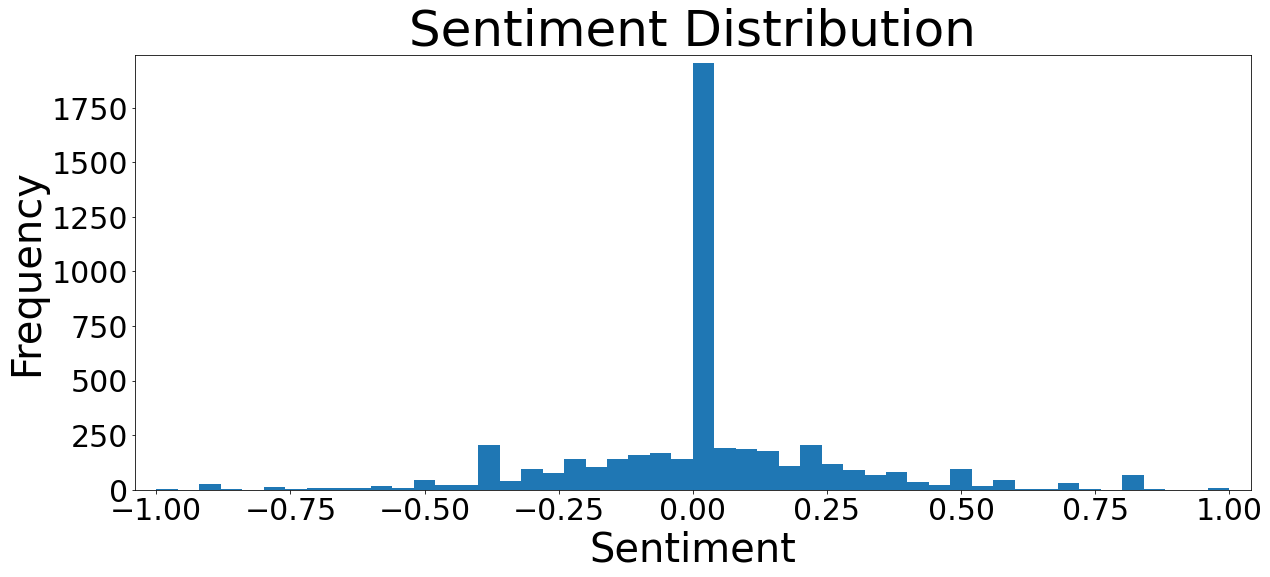

In [ ]:
plt.figure(figsize=(20,8))
plt.margins(0.02)
plt.xlabel('Sentiment', fontsize=40)
plt.xticks(fontsize=30)
plt.ylabel('Frequency', fontsize=40)
plt.yticks(fontsize=30)
plt.hist(df1['sentiment'], bins=50)
plt.title('Sentiment Distribution', fontsize=50)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(array([0, 1, 2, 3, 4]), <a list of 5 Text major ticklabel objects>)

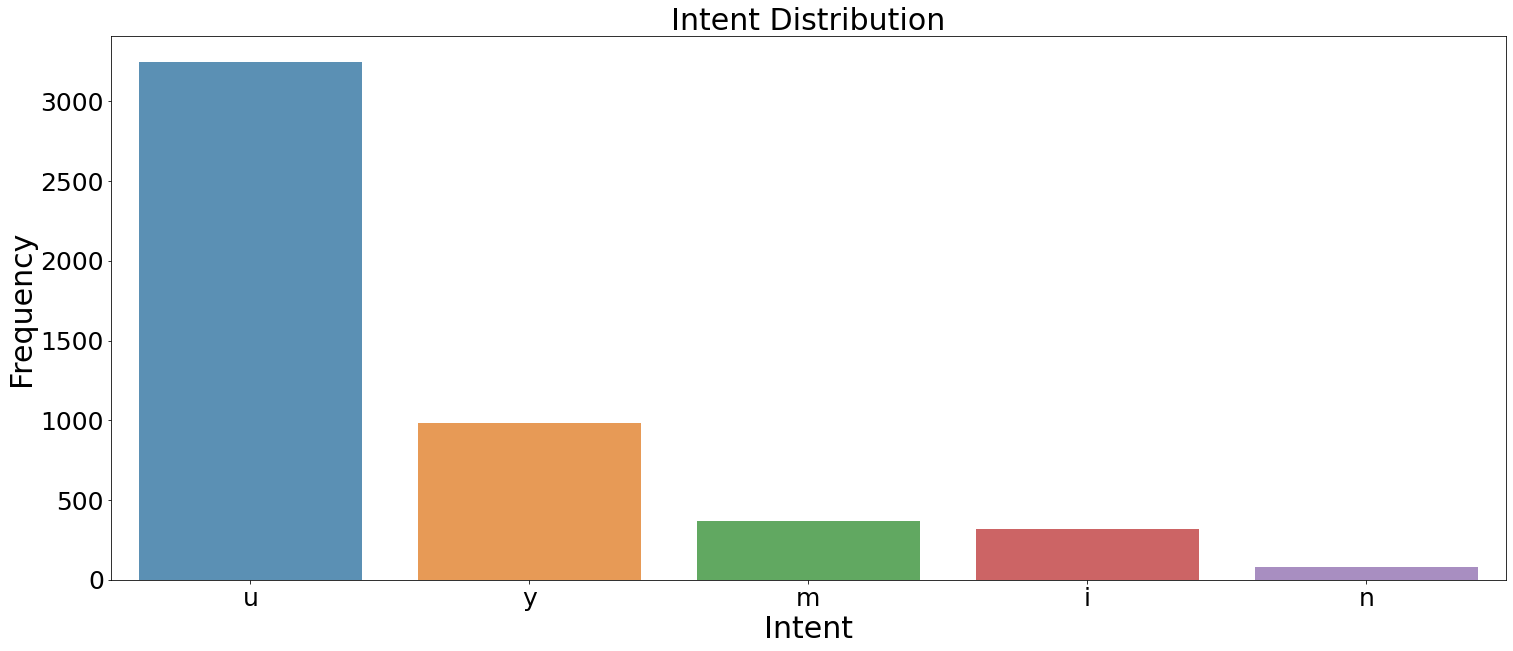

In [ ]:
x_rating = df1.Intent.value_counts()
y_rating = x_rating.sort_index()
plt.figure(figsize=(25,10))
sns.barplot(x_rating.index, x_rating.values, alpha=0.8)
plt.title("Intent Distribution", fontsize=30)
plt.ylabel('Frequency', fontsize=30)
plt.yticks(fontsize=25)
plt.xlabel('Intent', fontsize=30)
plt.xticks(fontsize=25)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(array([0, 1, 2, 3]), <a list of 4 Text major ticklabel objects>)

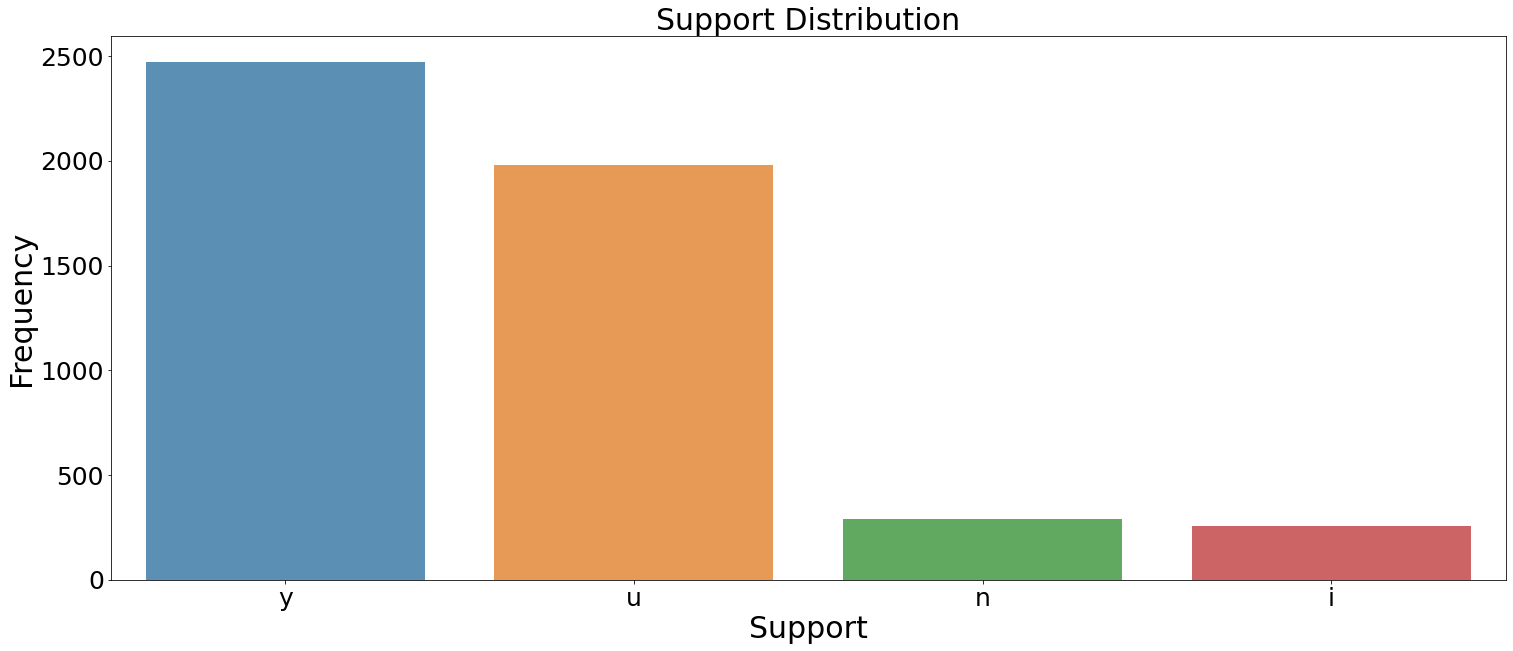

In [ ]:
x_rating = df1.Support.value_counts()
y_rating = x_rating.sort_index()
plt.figure(figsize=(25,10))
sns.barplot(x_rating.index, x_rating.values, alpha=0.8)
plt.title("Support Distribution", fontsize=30)
plt.ylabel('Frequency', fontsize=30)
plt.yticks(fontsize=25)
plt.xlabel('Support', fontsize=30)
plt.xticks(fontsize=25)

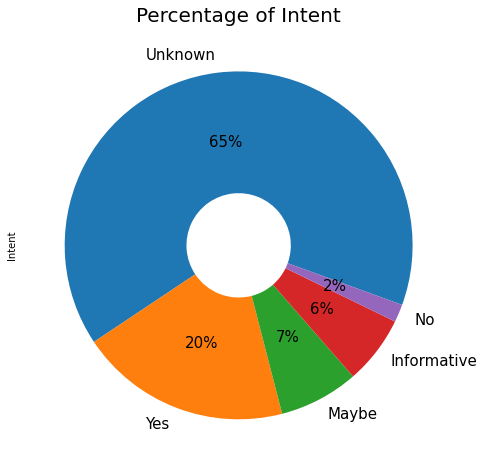

In [ ]:
plt.figure(figsize=(15,8))
plt.title('Percentage of Intent', fontsize=20)
df1.Intent.value_counts().plot(kind='pie', labels=['Unknown', 'Yes', 'Maybe', 'Informative', 'No'],
                              wedgeprops=dict(width=.7), autopct='%1.0f%%', startangle= -20, 
                              textprops={'fontsize': 15})

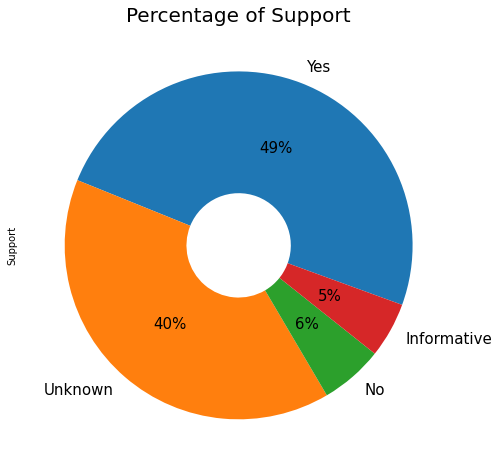

In [ ]:
plt.figure(figsize=(15,8))
plt.title('Percentage of Support', fontsize=20)
df1.Support.value_counts().plot(kind='pie', labels=[ 'Yes', 'Unknown',  'No', 'Informative'],
                              wedgeprops=dict(width=.7), autopct='%1.0f%%', startangle= -20, 
                              textprops={'fontsize': 15})

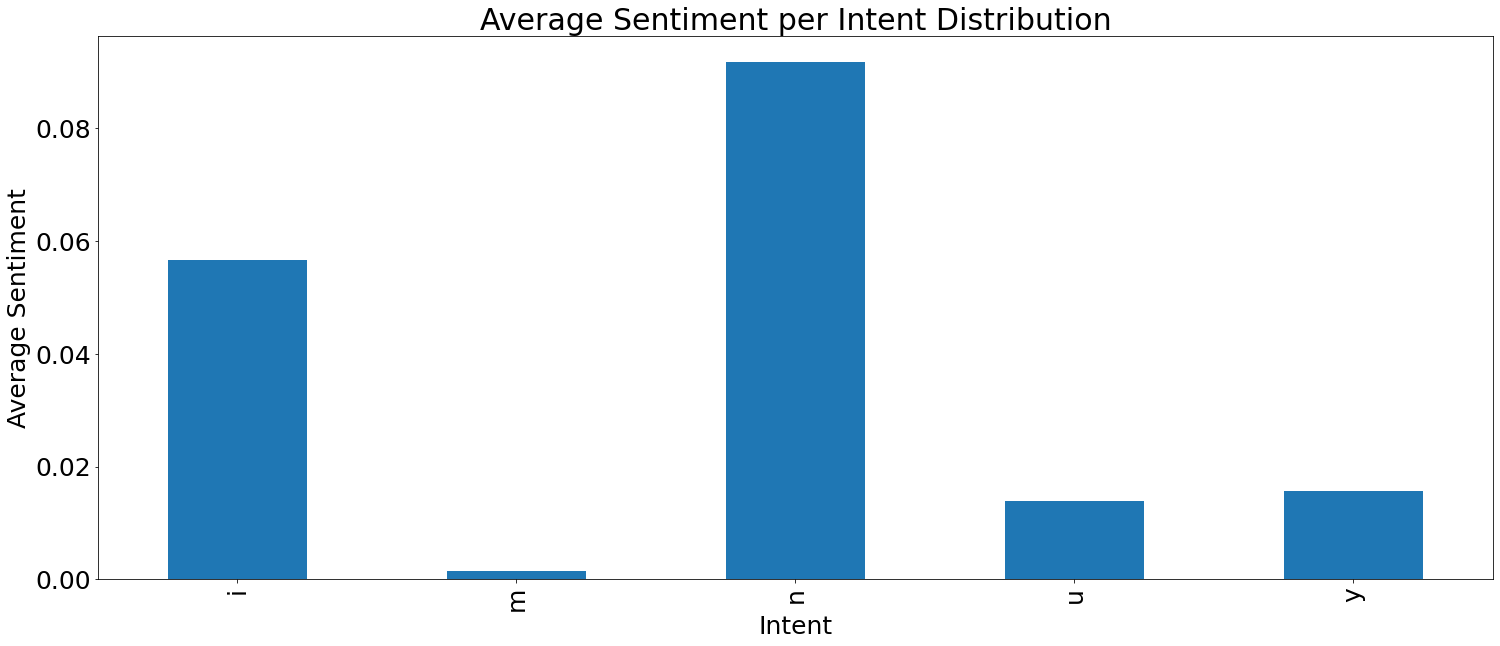

In [ ]:
polarity_avg = df1.groupby('Intent')['sentiment'].mean().plot(kind='bar', figsize=(25,10))
plt.xlabel('Intent', fontsize=25)
plt.ylabel('Average Sentiment', fontsize=25)
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
plt.title('Average Sentiment per Intent Distribution', fontsize=30)
plt.show()

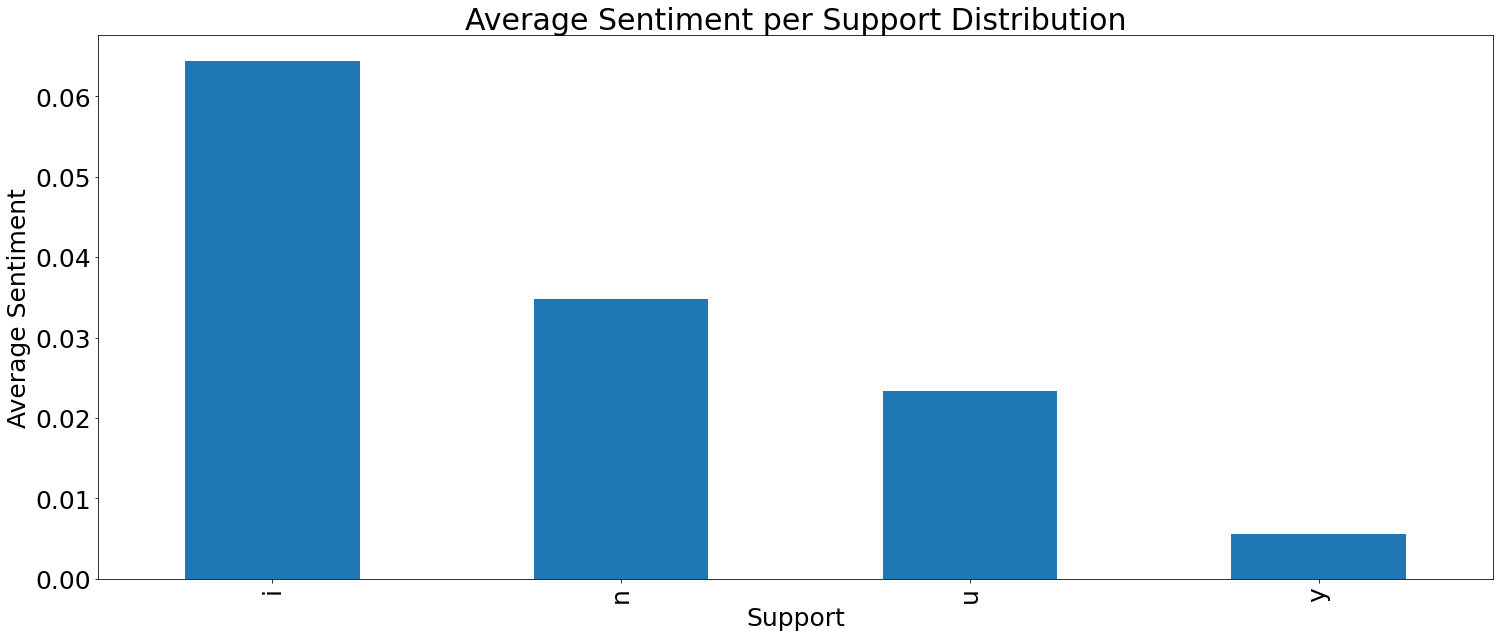

In [ ]:
polarity_avg = df1.groupby('Support')['sentiment'].mean().plot(kind='bar', figsize=(25,10))
plt.xlabel('Support', fontsize=25)
plt.ylabel('Average Sentiment', fontsize=25)
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
plt.title('Average Sentiment per Support Distribution', fontsize=30)
plt.show()

In [ ]:
df1['word_count'] = df1['Text_str'].apply(lambda x: len(str(x).split()))
df1['review_len'] = df1['Text_str'].astype(str).apply(len)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
df1.head()

,link_id,parent_id,User,lemmatized,Intent,Support,Text_str,sentiment,word_count,review_len
0,t3_l71j1l,t1_gl43z92,chasetate27,"[gme, bb, cashapp, amc, nok]",i,i,gme bb cashapp amc nok,0.000000,5,22
1,t3_ki3745,t3_ki3745,pmd5700,"[oh, gme, tease]",u,u,oh gme tease,0.000000,3,12
2,t3_la75n9,t3_la75n9,PigLizzard,"[dump, gme, amc, nok, bb, buy, silver]",u,n,dump gme amc nok bb buy silver,0.000000,7,30
3,t3_lw6hoh,t1_gpfpvtf,anono87,"[single, decent, dd, post, 9, billion, revenue...",u,u,single decent dd post 9 billion revenue last y...,0.178912,40,222
4,t3_l9xqem,t3_l9xqem,gluino,"[get, gme, 220]",y,u,get gme 220,0.000000,3,11


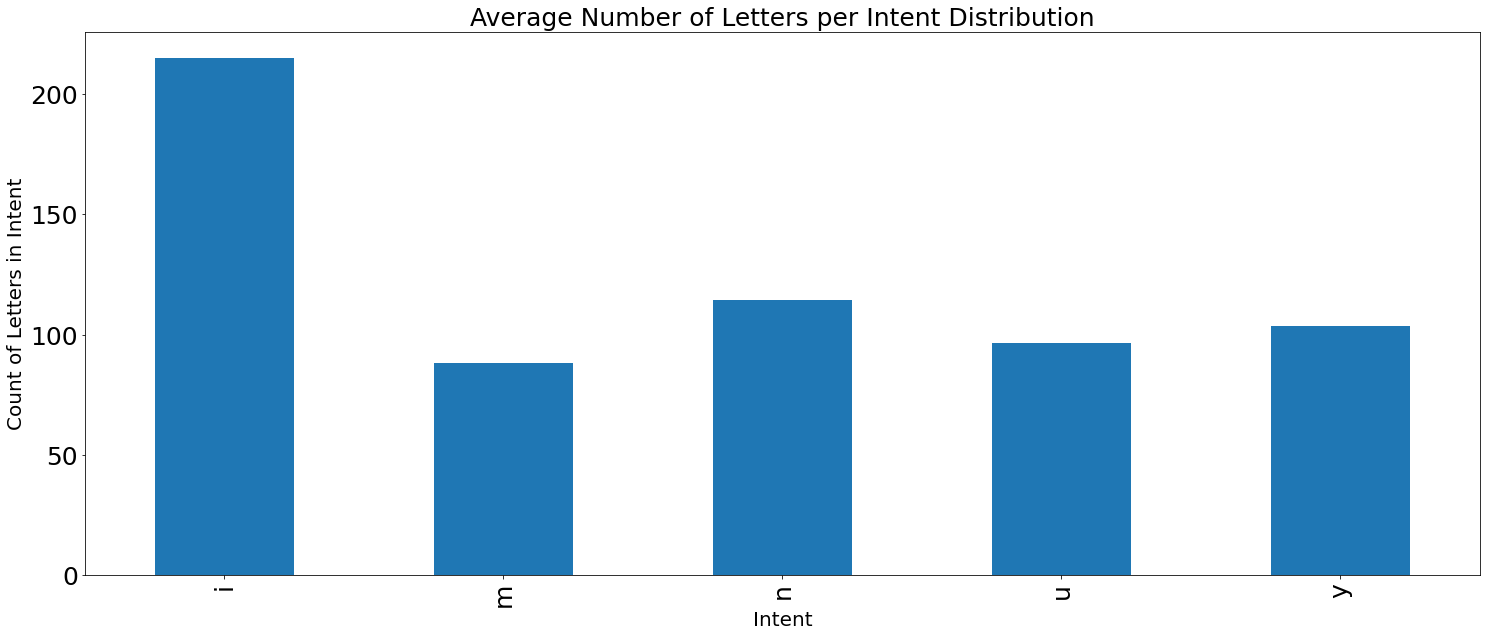

In [ ]:
letter_avg = df1.groupby('Intent')['review_len'].mean().plot(kind='bar', figsize=(25,10))
plt.xlabel('Intent', fontsize=20)
plt.ylabel('Count of Letters in Intent', fontsize=20)
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
plt.title('Average Number of Letters per Intent Distribution', fontsize=25)
plt.show()

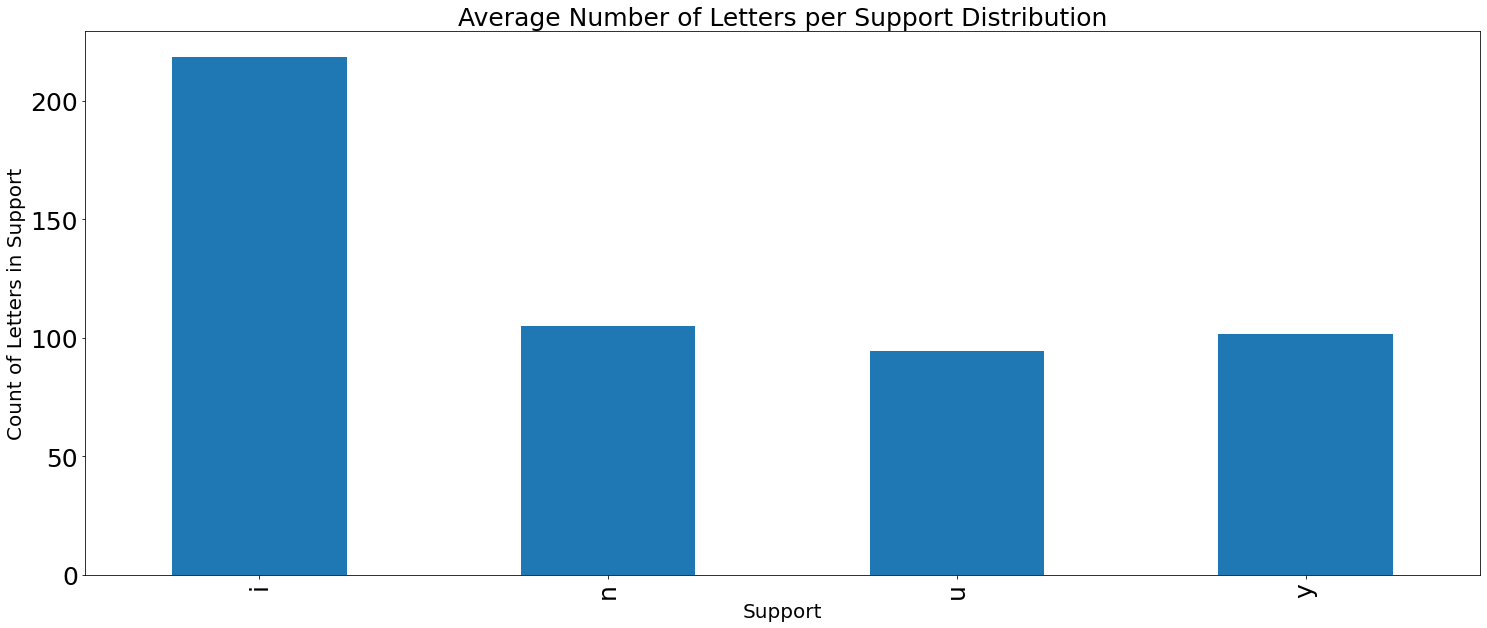

In [ ]:
letter_avg = df1.groupby('Support')['review_len'].mean().plot(kind='bar', figsize=(25,10))
plt.xlabel('Support', fontsize=20)
plt.ylabel('Count of Letters in Support', fontsize=20)
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
plt.title('Average Number of Letters per Support Distribution', fontsize=25)
plt.show()


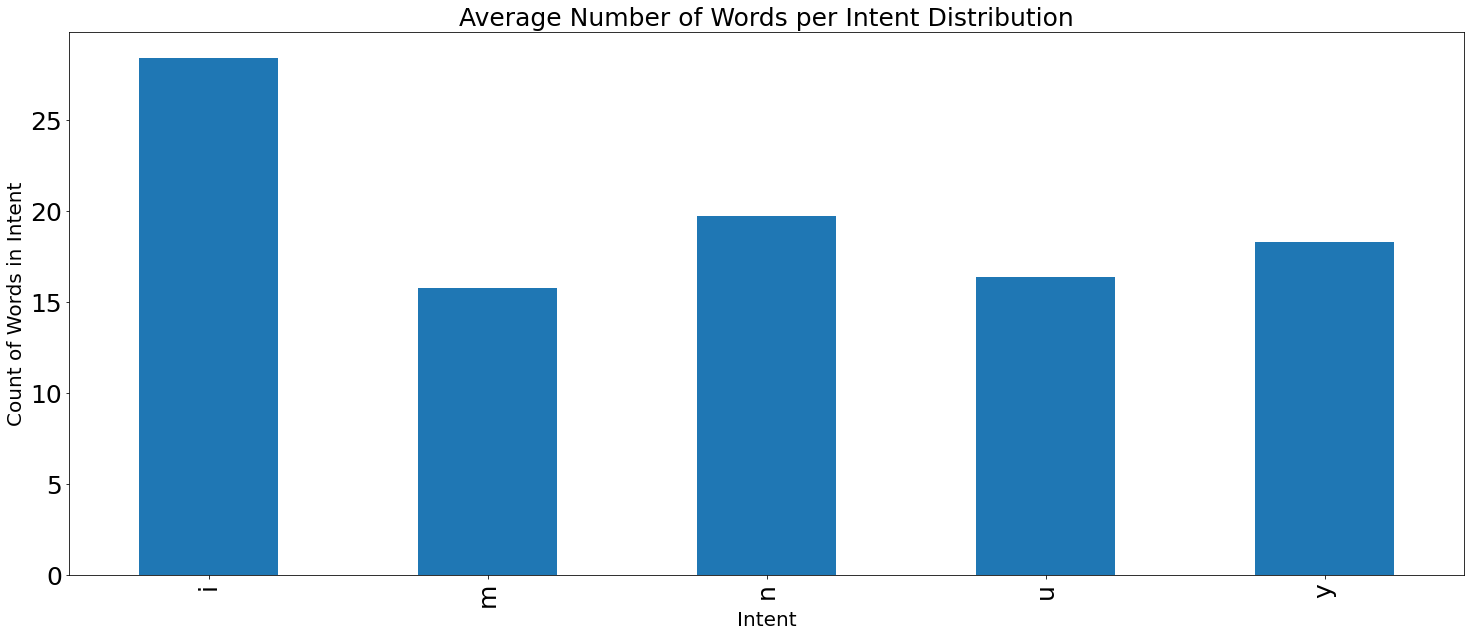

In [ ]:
word_avg = df1.groupby('Intent')['word_count'].mean().plot(kind='bar', figsize=(25,10))
plt.xlabel('Intent', fontsize=20)
plt.ylabel('Count of Words in Intent', fontsize=20)
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
plt.title('Average Number of Words per Intent Distribution', fontsize=25)
plt.show()

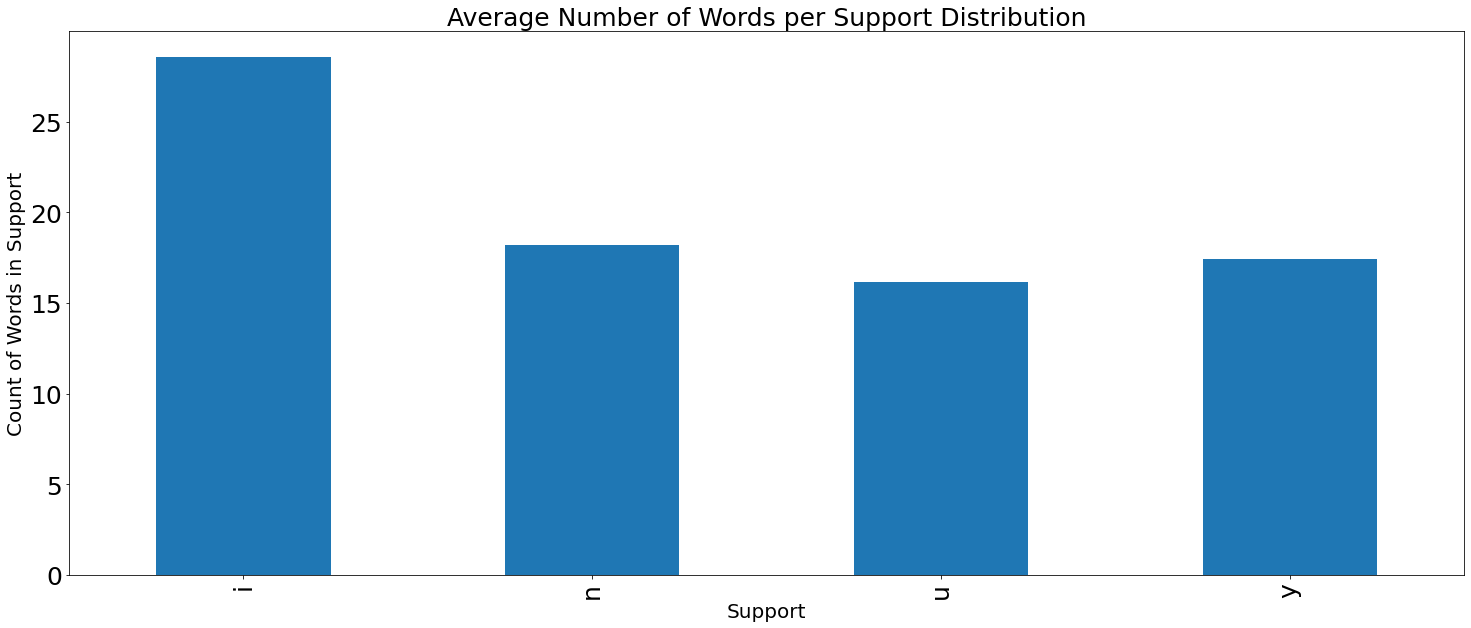

In [ ]:
word_avg = df1.groupby('Support')['word_count'].mean().plot(kind='bar', figsize=(25,10))
plt.xlabel('Support', fontsize=20)
plt.ylabel('Count of Words in Support', fontsize=20)
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
plt.title('Average Number of Words per Support Distribution', fontsize=25)
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


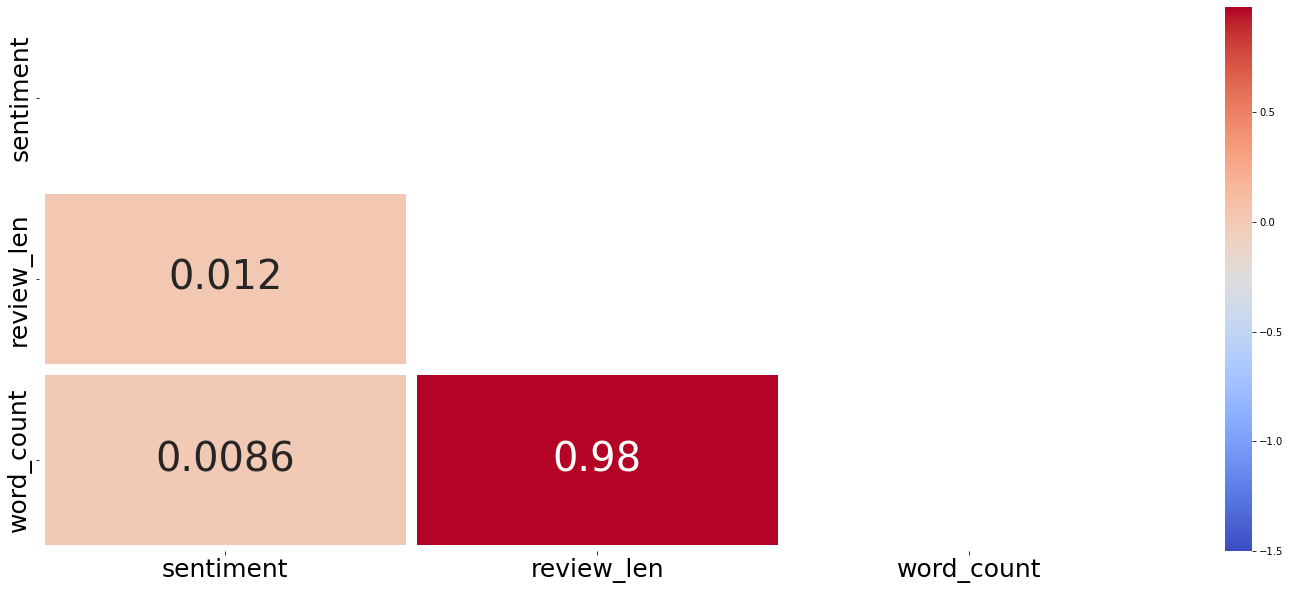

In [ ]:
correlation = df1[['Intent','sentiment', 'review_len', 'word_count']].corr()
mask = np.zeros_like(correlation, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize=(25,10))
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
sns.heatmap(correlation, cmap='coolwarm', annot=True, annot_kws={"size": 40}, linewidths=10, vmin=-1.5, mask=mask)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


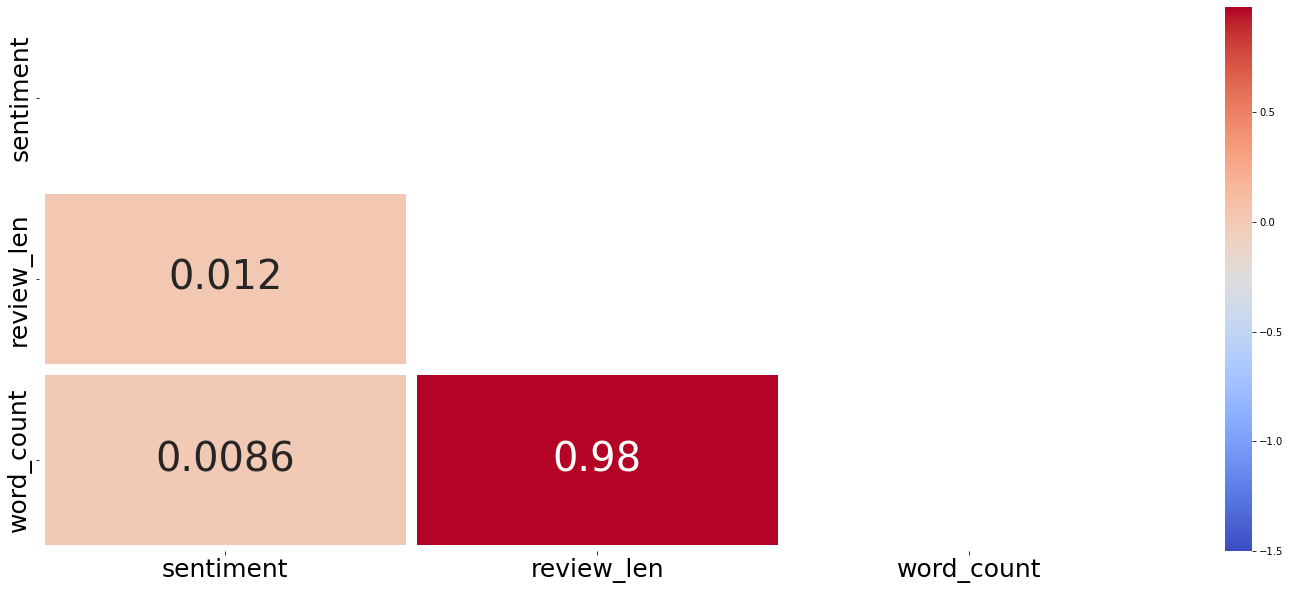

In [ ]:
correlation = df1[['Support', 'sentiment', 'review_len', 'word_count']].corr()
mask = np.zeros_like(correlation, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize=(25,10))
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
sns.heatmap(correlation, cmap='coolwarm', annot=True, annot_kws={"size": 40}, linewidths=10, vmin=-1.5, mask=mask)

Term Frequency Analysis

In [ ]:
words = df1['lemmatized']
allwords = []
for wordlist in words:
    allwords += wordlist
print(allwords)

['gme', 'bb', 'cashapp', 'amc', 'nok', 'oh', 'gme', 'tease', 'dump', 'gme', 'amc', 'nok', 'bb', 'buy', 'silver', 'single', 'decent', 'dd', 'post', '9', 'billion', 'revenue', 'last', 'year', 'special', 'dividend', 'buy', 'march', '9', '1', 'billion', 'share', 'buyback', 'disposal', 'short', 'seller', 'toast', 'gme', 'guess', 'nice', 'run', 'stock', 'like', 'rkt', 'trade', '18', '22', '6', 'month', 'consider', 'much', 'money', 'print', 'per', 'quarter', 'get', 'gme', '220', 'gme', 'go', '131', 'ah', 'break', '125', 'sell', 'wall', 'tomorrow', 'come', 'fast', 'plsss', '🚀🚀', 'double', 'position', 'gme', 'let', 'u', 'holdddddd🔥🔥🔥🔥🔥🔥🚀🚀🚀🚀🚀🚀🚀', 'sell', 'gme', 'buy', 'dip', 'big', 'money', 'sell', 'till', 'close', 'try', 'scare', 'position', 'currently', 'still', 'plan', 'get', 'back', 'gme', 'know', 'subject', 'change', 'mention', 'another', 'post', 'recently', 'one', 'give', 'hype', 'yet', 'want', 'see', 'gme', 'get', 'stable', '500', 'climb', 'give', 'totally', 'agree', 'crash', 'hard', 'tho

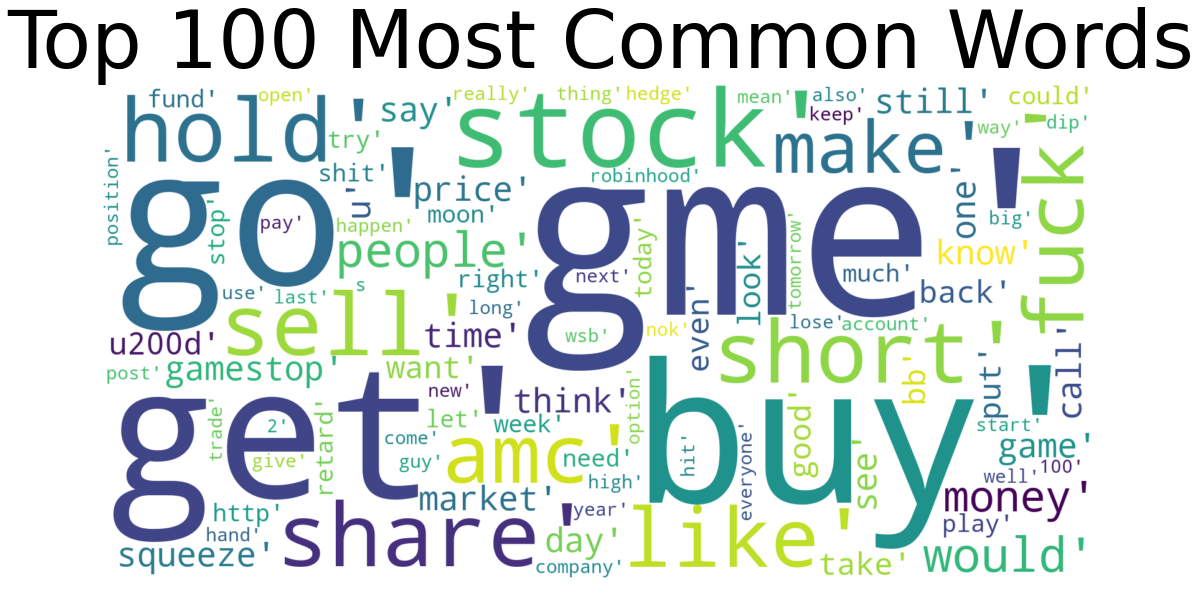

In [ ]:
mostcommon = FreqDist(allwords).most_common(100)
wordcloud = WordCloud(width=1600, height=800, background_color='white').generate(str(mostcommon))
fig = plt.figure(figsize=(25,8), facecolor='white')
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('Top 100 Most Common Words', fontsize=80)
plt.tight_layout(pad=0)
plt.show()

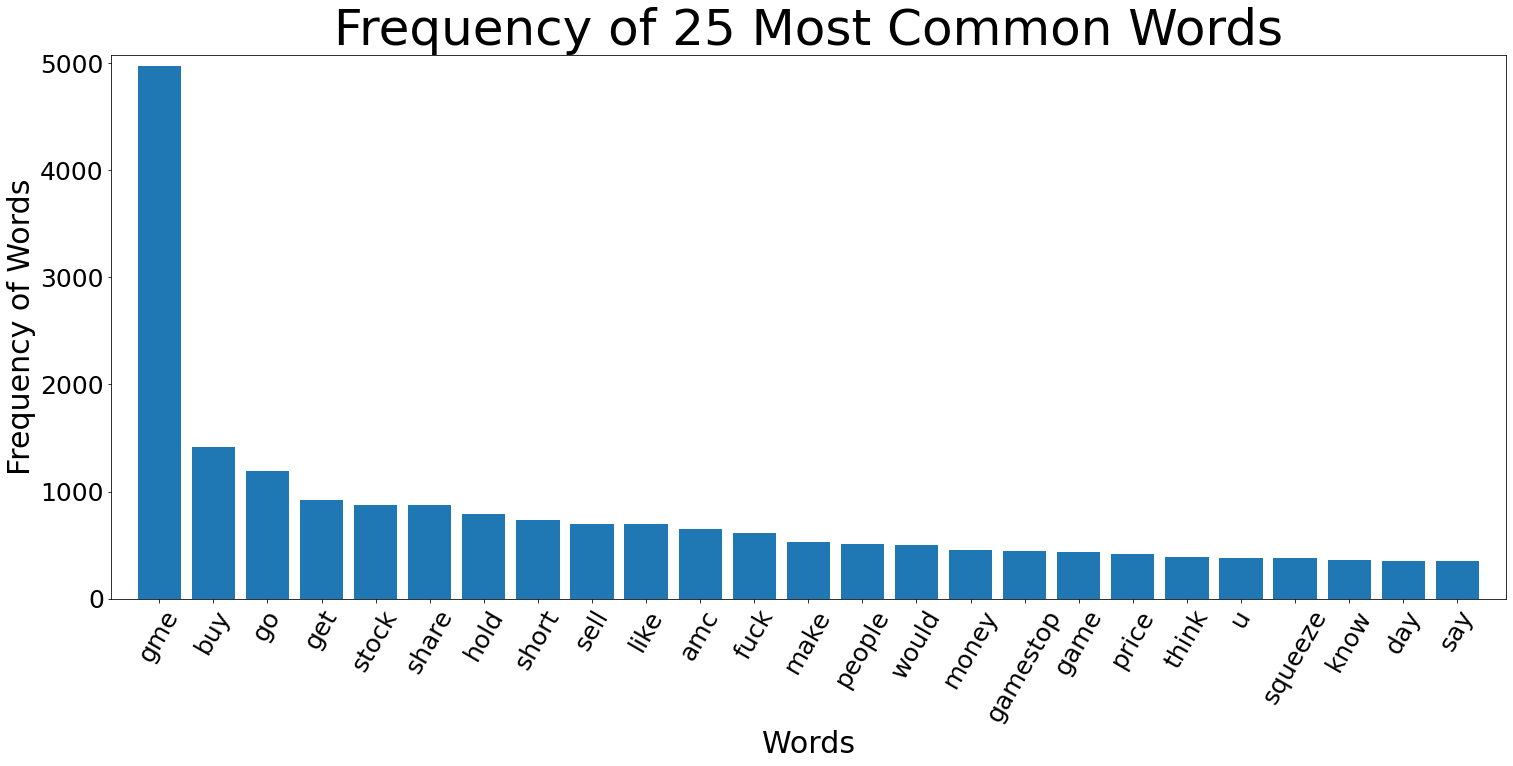

In [ ]:
mostcommon_small = FreqDist(allwords).most_common(25)
x, y = zip(*mostcommon_small)
plt.figure(figsize=(25,10))
plt.margins(0.02)
plt.bar(x, y)
plt.xlabel('Words', fontsize=30)
plt.ylabel('Frequency of Words', fontsize=30)
plt.yticks(fontsize=25)
plt.xticks(rotation=60, fontsize=25)
plt.title('Frequency of 25 Most Common Words', fontsize=50)
plt.show()

In [ ]:
pip install pad_sequences

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for pad-sequences: filename=pad_sequences-0.6.1-py3-none-any.whl size=10217 sha256=8ee6bcf025062f3a33975f2fce968d51f056b16fa078f4f7110bba05412a9ba4
  Stored in directory: /root/.cache/pip/wheels/3f/80/05/48e28be7b6bde8b3378f747f50bc32a87cb281c2e89ae74500
Successfully built pad-sequences


In [ ]:
# helps in text preprocessing
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer

# helps in model building

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import SimpleRNN
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Embedding
from tensorflow.keras.callbacks import EarlyStopping

# split data into train and test set
from sklearn.model_selection import train_test_split



In [ ]:
from keras.layers import LSTM


In [ ]:
from sklearn import preprocessing
labelencoder = preprocessing.LabelEncoder()

In [ ]:
df1['Intentno'] = df1['Intent'].map({'y': 1, 'n': 0,'u':2,'m':3,'i':4})
df1['Supportno'] = df1['Support'].map({'y': 1, 'n': 0,'u':2,'m':3,'i':4})


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
messages = np.asarray(df1['Text_str'])
labels1 = np.asarray(df1['Intentno'])
labels2 = np.asarray(df1['Supportno'])

In [ ]:
from keras.preprocessing.text import Tokenizer
max_vocab = 10000
max_len = 500
tokenizer = Tokenizer(num_words=max_vocab)
tokenizer.fit_on_texts(messages)
sequences = tokenizer.texts_to_sequences(messages)

In [ ]:
from keras_preprocessing.sequence import pad_sequences
word_index = tokenizer.word_index
data = pad_sequences(sequences, maxlen=max_len)

In [ ]:
train_samples = int(len(messages)*0.8)
messages_train = data[:train_samples]
labels_train1 = labels1[:train_samples]
labels_train2 = labels2[:train_samples]
messages_test = data[train_samples:len(messages)-2]
labels_test1 = labels1[train_samples:len(messages)-2]
labels_test2= labels2[train_samples:len(messages)-2]

**RNN**

In [ ]:
embedding_mat_columns=32
model = Sequential()
model.add(Embedding(input_dim=max_vocab,
                    output_dim=embedding_mat_columns,
                    input_length=max_len))
model.add(SimpleRNN(units=embedding_mat_columns))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop', loss='binary_crossentropy',
              metrics=['acc'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 500, 32)           320000    
                                                                 
 simple_rnn (SimpleRNN)      (None, 32)                2080      
                                                                 
 dense (Dense)               (None, 1)                 33        
                                                                 
Total params: 322,113
Trainable params: 322,113
Non-trainable params: 0
_________________________________________________________________


RNN ON INTENT

In [ ]:
model.fit(messages_train, labels_train1, epochs=10, batch_size=100, validation_split=0.2)

Epoch 1/10
32/32 [==============================] - 9s 243ms/step - loss: -2.6501 - acc: 0.2031 - val_loss: -5.1279 - val_acc: 0.1875
Epoch 2/10
32/32 [==============================] - 9s 287ms/step - loss: -6.1645 - acc: 0.2059 - val_loss: -7.6325 - val_acc: 0.1875
Epoch 3/10
32/32 [==============================] - 9s 283ms/step - loss: -8.2211 - acc: 0.2059 - val_loss: -9.5246 - val_acc: 0.1875
Epoch 4/10
32/32 [==============================] - 9s 277ms/step - loss: -9.8486 - acc: 0.2059 - val_loss: -10.9991 - val_acc: 0.1875
Epoch 5/10
32/32 [==============================] - 4s 126ms/step - loss: -11.0937 - acc: 0.2059 - val_loss: -12.1772 - val_acc: 0.1875
Epoch 6/10
32/32 [==============================] - 4s 126ms/step - loss: -12.1636 - acc: 0.2059 - val_loss: -13.2652 - val_acc: 0.1875
Epoch 7/10
32/32 [==============================] - 4s 127ms/step - loss: -13.1988 - acc: 0.2059 - val_loss: -14.3333 - val_acc: 0.1875
Epoch 8/10
32/32 [==============================] - 4s 

In [ ]:
acc = model.evaluate(messages_test, labels_test1)
print("Test loss is {0:.2f} accuracy is {1:.2f}  ".format(acc[0],acc[1]))

32/32 [==============================] - 1s 25ms/step - loss: -16.6081 - acc: 0.1743
Test loss is -16.61 accuracy is 0.17  


RNN on support

In [ ]:
model.fit(messages_train, labels_train2, epochs=10, batch_size=100, validation_split=0.2)

Epoch 1/10
32/32 [==============================] - 4s 132ms/step - loss: -8.7873 - acc: 0.4941 - val_loss: -8.4778 - val_acc: 0.5063
Epoch 2/10
32/32 [==============================] - 5s 170ms/step - loss: -9.2677 - acc: 0.4941 - val_loss: -8.9616 - val_acc: 0.5063
Epoch 3/10
32/32 [==============================] - 4s 128ms/step - loss: -9.7763 - acc: 0.4941 - val_loss: -9.4378 - val_acc: 0.5063
Epoch 4/10
32/32 [==============================] - 4s 127ms/step - loss: -10.2870 - acc: 0.4941 - val_loss: -9.9228 - val_acc: 0.5063
Epoch 5/10
32/32 [==============================] - 4s 127ms/step - loss: -10.8081 - acc: 0.4941 - val_loss: -10.4130 - val_acc: 0.5063
Epoch 6/10
32/32 [==============================] - 4s 126ms/step - loss: -11.3207 - acc: 0.4941 - val_loss: -10.8941 - val_acc: 0.5063
Epoch 7/10
32/32 [==============================] - 4s 128ms/step - loss: -11.8365 - acc: 0.4941 - val_loss: -11.3793 - val_acc: 0.5063
Epoch 8/10
32/32 [==============================] - 4s 

In [ ]:
acc = model.evaluate(messages_test, labels_test2)
print("Test loss is {0:.2f} accuracy is {1:.2f}  ".format(acc[0],acc[1]))

32/32 [==============================] - 1s 25ms/step - loss: -13.6852 - acc: 0.4870
Test loss is -13.69 accuracy is 0.49  


**LSTM**

In [ ]:
from keras.layers.core import Dense, SpatialDropout1D
model = Sequential()
model.add(Embedding(input_dim=max_vocab,
                    output_dim=embedding_mat_columns,
                    input_length=max_len))
model.add(SpatialDropout1D(0.4))
model.add(LSTM(176, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1,activation='softmax'))
model.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics = ['accuracy'])
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 500, 32)           320000    
                                                                 
 spatial_dropout1d (SpatialD  (None, 500, 32)          0         
 ropout1D)                                                       
                                                                 
 lstm (LSTM)                 (None, 176)               147136    
                                                                 
 dense_1 (Dense)             (None, 1)                 177       
                                                                 
Total params: 467,313
Trainable params: 467,313
Non-trainable params: 0
_________________________________________________________________
None


LSTM ON INTENT

In [ ]:
model.fit(messages_train, labels_train1, epochs=10, batch_size=100, validation_split=0.2)

Epoch 1/10
32/32 [==============================] - 128s 4s/step - loss: 0.0000e+00 - accuracy: 0.2059 - val_loss: 0.0000e+00 - val_accuracy: 0.1875
Epoch 2/10
32/32 [==============================] - 121s 4s/step - loss: 0.0000e+00 - accuracy: 0.2059 - val_loss: 0.0000e+00 - val_accuracy: 0.1875
Epoch 3/10
32/32 [==============================] - 123s 4s/step - loss: 0.0000e+00 - accuracy: 0.2059 - val_loss: 0.0000e+00 - val_accuracy: 0.1875
Epoch 4/10
32/32 [==============================] - 120s 4s/step - loss: 0.0000e+00 - accuracy: 0.2059 - val_loss: 0.0000e+00 - val_accuracy: 0.1875
Epoch 5/10
32/32 [==============================] - 123s 4s/step - loss: 0.0000e+00 - accuracy: 0.2059 - val_loss: 0.0000e+00 - val_accuracy: 0.1875
Epoch 6/10
32/32 [==============================] - 119s 4s/step - loss: 0.0000e+00 - accuracy: 0.2059 - val_loss: 0.0000e+00 - val_accuracy: 0.1875
Epoch 7/10
32/32 [==============================] - 121s 4s/step - loss: 0.0000e+00 - accuracy: 0.2059 - v

In [ ]:
acc = model.evaluate(messages_test, labels_test1)
print("Test loss is {0:.2f} accuracy is {1:.2f}  ".format(acc[0],acc[1]))

32/32 [==============================] - 7s 202ms/step - loss: 0.0000e+00 - accuracy: 0.1743
Test loss is 0.00 accuracy is 0.17  


LSTM ON SUPPOT

In [ ]:
model.fit(messages_train, labels_train2, epochs=10, batch_size=100, validation_split=0.2)

Epoch 1/10
32/32 [==============================] - 125s 4s/step - loss: 0.0000e+00 - accuracy: 0.4941 - val_loss: 0.0000e+00 - val_accuracy: 0.5063
Epoch 2/10
32/32 [==============================] - 123s 4s/step - loss: 0.0000e+00 - accuracy: 0.4941 - val_loss: 0.0000e+00 - val_accuracy: 0.5063
Epoch 3/10
32/32 [==============================] - 121s 4s/step - loss: 0.0000e+00 - accuracy: 0.4941 - val_loss: 0.0000e+00 - val_accuracy: 0.5063
Epoch 4/10
32/32 [==============================] - 124s 4s/step - loss: 0.0000e+00 - accuracy: 0.4941 - val_loss: 0.0000e+00 - val_accuracy: 0.5063
Epoch 5/10
32/32 [==============================] - 121s 4s/step - loss: 0.0000e+00 - accuracy: 0.4941 - val_loss: 0.0000e+00 - val_accuracy: 0.5063
Epoch 6/10
32/32 [==============================] - 123s 4s/step - loss: 0.0000e+00 - accuracy: 0.4941 - val_loss: 0.0000e+00 - val_accuracy: 0.5063
Epoch 7/10
32/32 [==============================] - 124s 4s/step - loss: 0.0000e+00 - accuracy: 0.4941 - v

In [ ]:
acc = model.evaluate(messages_test, labels_test2)
print("Test loss is {0:.2f} accuracy is {1:.2f}  ".format(acc[0],acc[1]))

32/32 [==============================] - 8s 256ms/step - loss: 0.0000e+00 - accuracy: 0.4870
Test loss is 0.00 accuracy is 0.49  


**GRU**

In [ ]:
from keras.layers import Dense, Dropout, Embedding, LSTM, Bidirectional,GRU,RepeatVector,TimeDistributed
model = Sequential(name="GRU-Model") # Model
model.add(Embedding(input_dim=max_vocab,
                    output_dim=embedding_mat_columns,
                    input_length=max_len))
model.add(Bidirectional(GRU(units=32, activation='tanh', recurrent_activation='sigmoid', stateful=False), name='Hidden-GRU-Encoder-Layer')) # Encoder Layer
model.add(RepeatVector(max_vocab, name='Repeat-Vector-Layer')) # Repeat Vector
model.add(Bidirectional(GRU(units=32, activation='tanh', recurrent_activation='sigmoid', stateful=False, return_sequences=True), name='Hidden-GRU-Decoder-Layer')) # Decoder Layer
model.add(TimeDistributed(Dense(units=1, activation='linear'), name='Output-Layer')) # Output Layer, Linear(x) = x


In [ ]:
##### Step 4 - Compile the model
model.compile(optimizer='adam', # default='rmsprop', an algorithm to be used in backpropagation
              loss='mean_squared_error', # Loss function to be optimized. A string (name of loss function), or a tf.keras.losses.Loss instance.
              metrics = ['accuracy']
             )


GRU ON INTENT

In [ ]:
##### Step 5 - Fit the model on the dataset
history = model.fit(messages_train, # input data
                    labels_train1, # target data
                    batch_size=100, # Number of samples per gradient update. If unspecified, batch_size will default to 32.
                    epochs=10, # default=1, Number of epochs to train the model. An epoch is an iteration over the entire x and y data provided
                    validation_split=0.2, # default=0.0, Fraction of the training data to be used as validation data. The model will set apart this fraction of the training data, will not train on it, and will evaluate the loss and any model metrics on this data at the end of each epoch. 
                    shuffle=True, # default=True, Boolean (whether to shuffle the training data before each epoch) or str (for 'batch').
                   )


Epoch 1/10
32/32 [==============================] - 869s 27s/step - loss: 1.7349 - accuracy: 0.1543 - val_loss: 0.7444 - val_accuracy: 0.1875
Epoch 2/10
32/32 [==============================] - 860s 27s/step - loss: 0.6257 - accuracy: 0.2059 - val_loss: 0.6522 - val_accuracy: 0.1875
Epoch 3/10
32/32 [==============================] - 872s 27s/step - loss: 0.5985 - accuracy: 0.2059 - val_loss: 0.6456 - val_accuracy: 0.1875
Epoch 4/10
32/32 [==============================] - 857s 27s/step - loss: 0.5984 - accuracy: 0.2059 - val_loss: 0.6377 - val_accuracy: 0.1875
Epoch 5/10
32/32 [==============================] - 864s 27s/step - loss: 0.5967 - accuracy: 0.2059 - val_loss: 0.6584 - val_accuracy: 0.1875
Epoch 6/10
32/32 [==============================] - 863s 27s/step - loss: 0.5941 - accuracy: 0.2059 - val_loss: 0.6493 - val_accuracy: 0.1875
Epoch 7/10
32/32 [==============================] - 864s 27s/step - loss: 0.5945 - accuracy: 0.2059 - val_loss: 0.6382 - val_accuracy: 0.1875
Epoch 

In [ ]:
acc = model.evaluate(messages_test, labels_test1)
print("Test loss is {0:.2f} accuracy is {1:.2f}  ".format(acc[0],acc[1]))

32/32 [==============================] - 54s 2s/step - loss: 0.5454 - accuracy: 0.1743
Test loss is 0.55 accuracy is 0.17  


GRU ON SUPPORT

In [ ]:
##### Step 5 - Fit the model on the dataset
history = model.fit(messages_train, # input data
                    labels_train2, # target data
                    batch_size=100, # Number of samples per gradient update. If unspecified, batch_size will default to 32.
                    epochs=10, # default=1, Number of epochs to train the model. An epoch is an iteration over the entire x and y data provided
                    verbose=1, # default='auto', ('auto', 0, 1, or 2). Verbosity mode. 0 = silent, 1 = progress bar, 2 = one line per epoch. 'auto' defaults to 1 for most cases, but 2 when used with ParameterServerStrategy.
                    validation_split=0.2, # default=0.0, Fraction of the training data to be used as validation data. The model will set apart this fraction of the training data, will not train on it, and will evaluate the loss and any model metrics on this data at the end of each epoch. 
                    #validation_data=(X_test, y_test), # default=None, Data on which to evaluate the loss and any model metrics at the end of each epoch. 
                    shuffle=True, # default=True, Boolean (whether to shuffle the training data before each epoch) or str (for 'batch').
                   )

Epoch 1/10
32/32 [==============================] - 765s 24s/step - loss: 1.3085 - accuracy: 0.3678 - val_loss: 0.7441 - val_accuracy: 0.5063
Epoch 2/10
32/32 [==============================] - 764s 24s/step - loss: 0.7039 - accuracy: 0.4941 - val_loss: 0.7086 - val_accuracy: 0.5063
Epoch 3/10
32/32 [==============================] - 770s 24s/step - loss: 0.6844 - accuracy: 0.4941 - val_loss: 0.7075 - val_accuracy: 0.5063
Epoch 4/10
32/32 [==============================] - 776s 24s/step - loss: 0.6844 - accuracy: 0.4941 - val_loss: 0.7078 - val_accuracy: 0.5063
Epoch 5/10
32/32 [==============================] - 735s 23s/step - loss: 0.6827 - accuracy: 0.4941 - val_loss: 0.7147 - val_accuracy: 0.5063
Epoch 6/10
32/32 [==============================] - 893s 28s/step - loss: 0.6866 - accuracy: 0.4941 - val_loss: 0.7104 - val_accuracy: 0.5063
Epoch 7/10
32/32 [==============================] - 897s 28s/step - loss: 0.6821 - accuracy: 0.4941 - val_loss: 0.7079 - val_accuracy: 0.5063
Epoch 

In [65]:
acc = model.evaluate(messages_test, labels_test2)
print("Test loss is {0:.2f} accuracy is {1:.2f}  ".format(acc[0],acc[1]))

32/32 [==============================] - 70s 2s/step - loss: 0.6377 - accuracy: 0.4870
Test loss is 0.64 accuracy is 0.49  
